In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Part 1
#Problem 1

import os
import pandas as pd

#Define directory and country codes
data_dir = '/Users/hteshome/Desktop/Training/Pytools_Class/07-visualization-haile-teshome/ddf--datapoints--population--by--country--age--gender--year'
country_codes = ['abw', 'chn', 'usa', 'ind', 'bra']

#Create a list to store DataFrames for all countries
dfs = []

#Load all files in directory that match country code to a dataframe
for code in country_codes:
    all_files = [f for f in os.listdir(data_dir) if f"country-{code}" in f]
    for file_name in all_files:
        file_path = os.path.join(data_dir, file_name)
        try:
            df = pd.read_csv(file_path)
            df['country_code'] = code  
            dfs.append(df)  
            print(f"Loaded data for country code: {code} from {file_name}")
        except FileNotFoundError:
            print(f"File not found: {file_path}")
if dfs:
    combined_data = pd.concat(dfs, ignore_index=True)
    print("All country data combined into a single DataFrame.")
else:
    print("No data found for the specified countries.")



Loaded data for country code: abw from ddf--datapoints--population--by--country-abw--age--gender--year.csv
Loaded data for country code: chn from ddf--datapoints--population--by--country-chn--age--gender--year.csv
Loaded data for country code: usa from ddf--datapoints--population--by--country-usa--age--gender--year.csv
Loaded data for country code: ind from ddf--datapoints--population--by--country-ind--age--gender--year.csv
Loaded data for country code: bra from ddf--datapoints--population--by--country-bra--age--gender--year.csv
All country data combined into a single DataFrame.


In [3]:
total_population = {}
for df in dfs:
    country_code = df['country_code'].iloc[0]
    total_population[country_code] = df.groupby('year')['population'].sum()

total_population_df = pd.DataFrame(total_population)
print(total_population_df)


        abw        chn        usa         ind        bra
year                                                    
1950  42785  544044363  154202691   346278814   53408563
1951  43906  553758253  156481326   353870064   55018862
1952  45082  565131450  158794228   361874910   56694880
1953  46293  577557134  161168308   370104574   58433766
1954  47540  590113866  163636308   378687144   60235128
...     ...        ...        ...         ...        ...
2096  77241  676660876  418800087  1535804562  168241139
2097  76730  665695508  419461007  1528221490  167006444
2098  76221  654825395  420095822  1520590138  165782110
2099  75718  644049399  420702881  1512932643  164569640
2100  75219  633368103  421278894  1505251758  163364066

[151 rows x 5 columns]


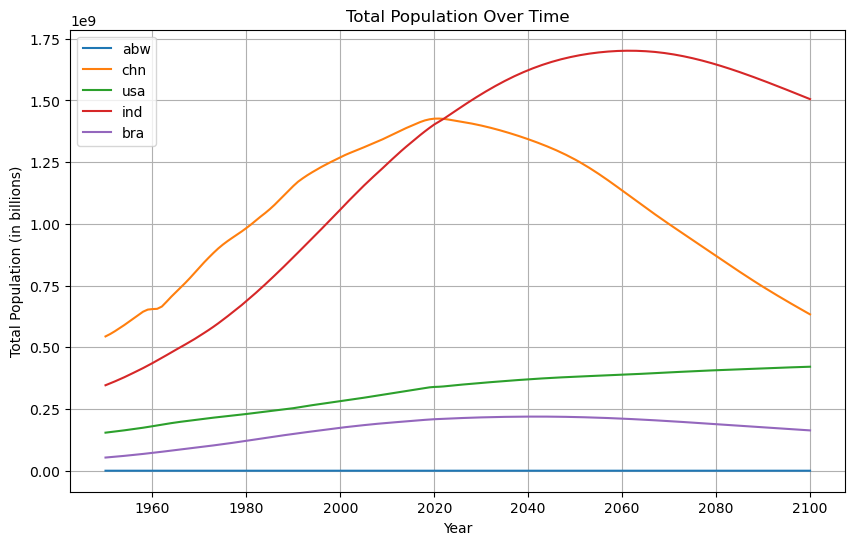

In [4]:
#Plot all populations on same graph
plt.figure(figsize=(10, 6))
for country, population in total_population.items():
    plt.plot(population.index, population.values, label=country)

plt.xlabel('Year')
plt.ylabel('Total Population (in billions)')
plt.title('Total Population Over Time')
plt.legend()
plt.grid(True)
plt.show()


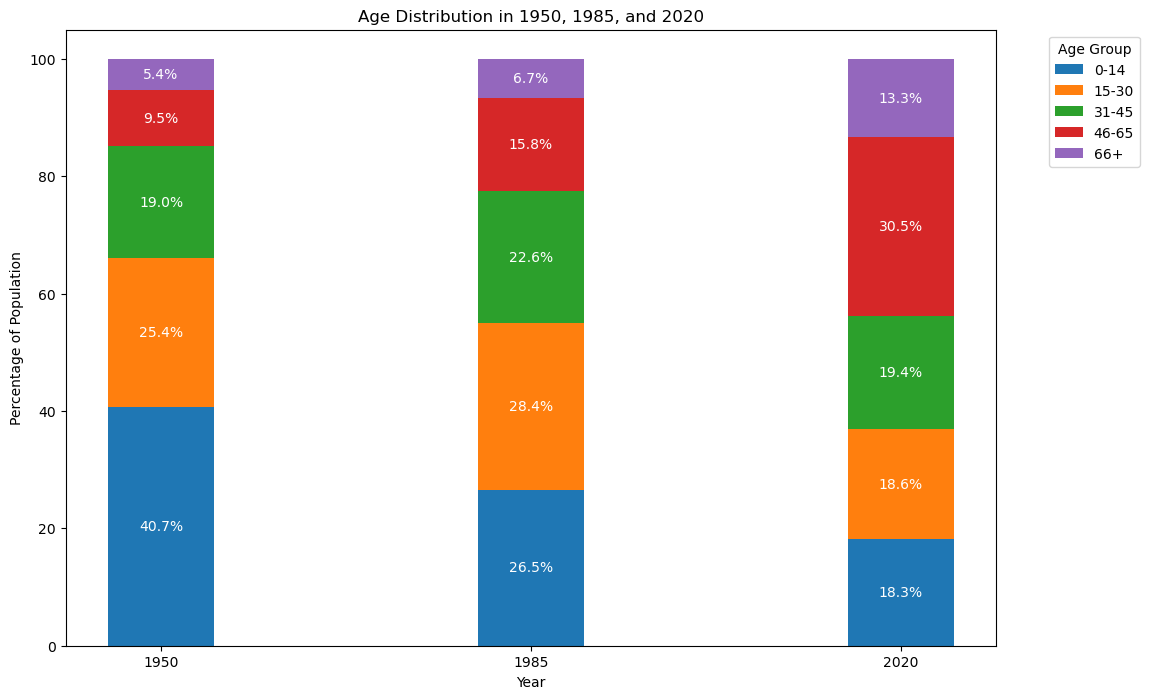

In [5]:
#Part 1
#Problem 2
age_groups = {
    '0-14': list(range(0, 15)),
    '15-30': list(range(15, 31)),
    '31-45': list(range(31, 46)),
    '46-65': list(range(46, 66)),
    '66+': list(range(66, 101))  # Assuming maximum age is 100
}

#Function to group by 'year' and 'age_group' and sum the population for each group
def aggregate_age_groups(df, age_groups):
    def map_age_to_group(age):
        for group, ages in age_groups.items():
            if age in ages:
                return group
        return None
    
    df['age_group'] = df['age'].apply(map_age_to_group)
    return df.groupby(['year', 'age_group'])['population'].sum().unstack('age_group')

# Load for specific country
df = pd.read_csv(f'{data_dir}/ddf--datapoints--population--by--country-abw--age--gender--year.csv')

#Aggregate data by age group
age_distribution = aggregate_age_groups(df, age_groups)

#Select years to compare
selected_years = [1950, 1985, 2020]

# Increase bar width and adjust the figure size
bar_width = 10  
plt.figure(figsize=(12, 8))  
bottoms = [0] * len(selected_years)

#Store bar handles for the legend and iterate over age groups to aggregate proportions
bars = [] 
for idx, age_group in enumerate(age_groups.keys()):
    year_percentages = []
    for year in selected_years:
        if year in age_distribution.index:
            df_year = age_distribution.loc[year]
            percentages = df_year.div(df_year.sum()) * 100  
            year_percentages.append(percentages.get(age_group, 0))  
        else:
            print(f"Year {year} not found in the dataset")
            year_percentages.append(0)

    # Plot the current age group as a stacked bar
    bar = plt.bar(selected_years, year_percentages, bar_width, bottom=bottoms, label=age_group)
    bottoms = [b + p for b, p in zip(bottoms, year_percentages)]  
    bars.append(bar[0])

    for i in range(len(selected_years)):
        if year_percentages[i] > 0:  
            plt.text(selected_years[i], bottoms[i] - year_percentages[i] / 2, f'{year_percentages[i]:.1f}%', 
                     ha='center', va='center', color='white', fontsize=10)

plt.xticks(selected_years, [str(year) for year in selected_years])
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Age Distribution in 1950, 1985, and 2020')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


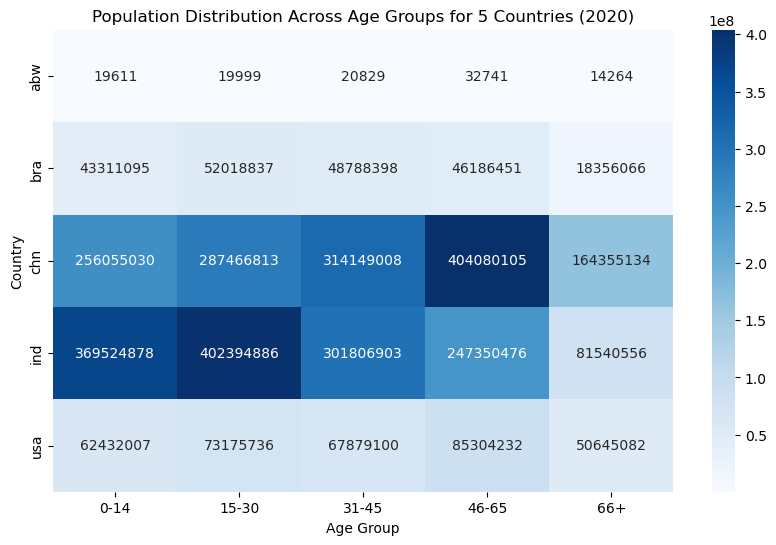

In [6]:
#Part 2
# Function to map numerical ages to age groups and aggregate population data
def map_age_to_group(age):
    for group, ages in age_groups.items():
        if age in ages:
            return group
    return None

#Load population data for 5 countries 
countries = ['abw', 'usa', 'chn', 'ind', 'bra']  # Example country codes

#Load and combine data for selected countries
dfs = []
for country in countries:
    df_country = pd.read_csv(f'{data_dir}/ddf--datapoints--population--by--country-{country}--age--gender--year.csv')
    df_country['country'] = country
    dfs.append(df_country)

df_combined = pd.concat(dfs)
df_combined['age_group'] = df_combined['age'].apply(map_age_to_group)
df_2020 = df_combined[df_combined['year'] == 2020]

#Group by country and age group, then sum the population
heatmap_data = df_2020.groupby(['country', 'age_group'])['population'].sum().unstack()

#Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.0f')
plt.title('Population Distribution Across Age Groups for 5 Countries (2020)')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.show()


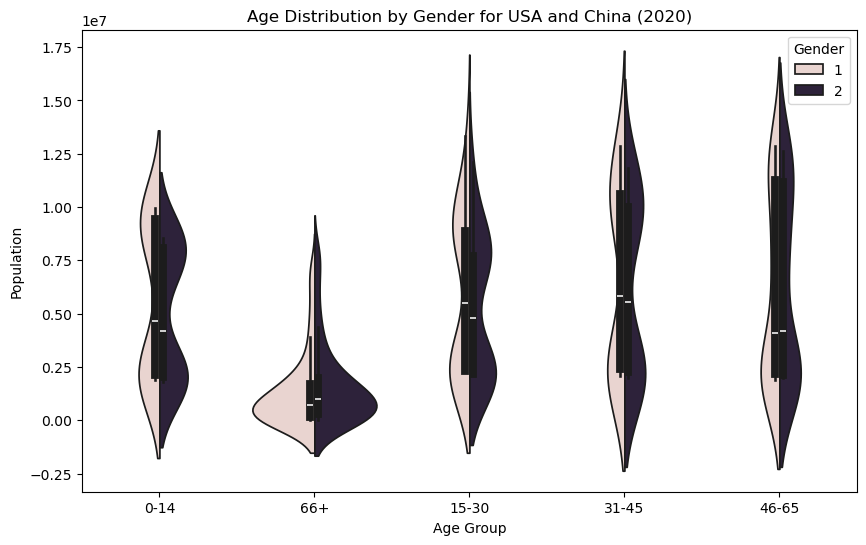

In [7]:
df_violin = df_combined[(df_combined['year'] == 2020) & (df_combined['country'].isin(['usa', 'chn']))]

# Plot side-by-side violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='population', hue='gender', data=df_violin, split=True)
plt.title('Age Distribution by Gender for USA and China (2020)')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.legend(title='Gender', loc='upper right')
plt.show()


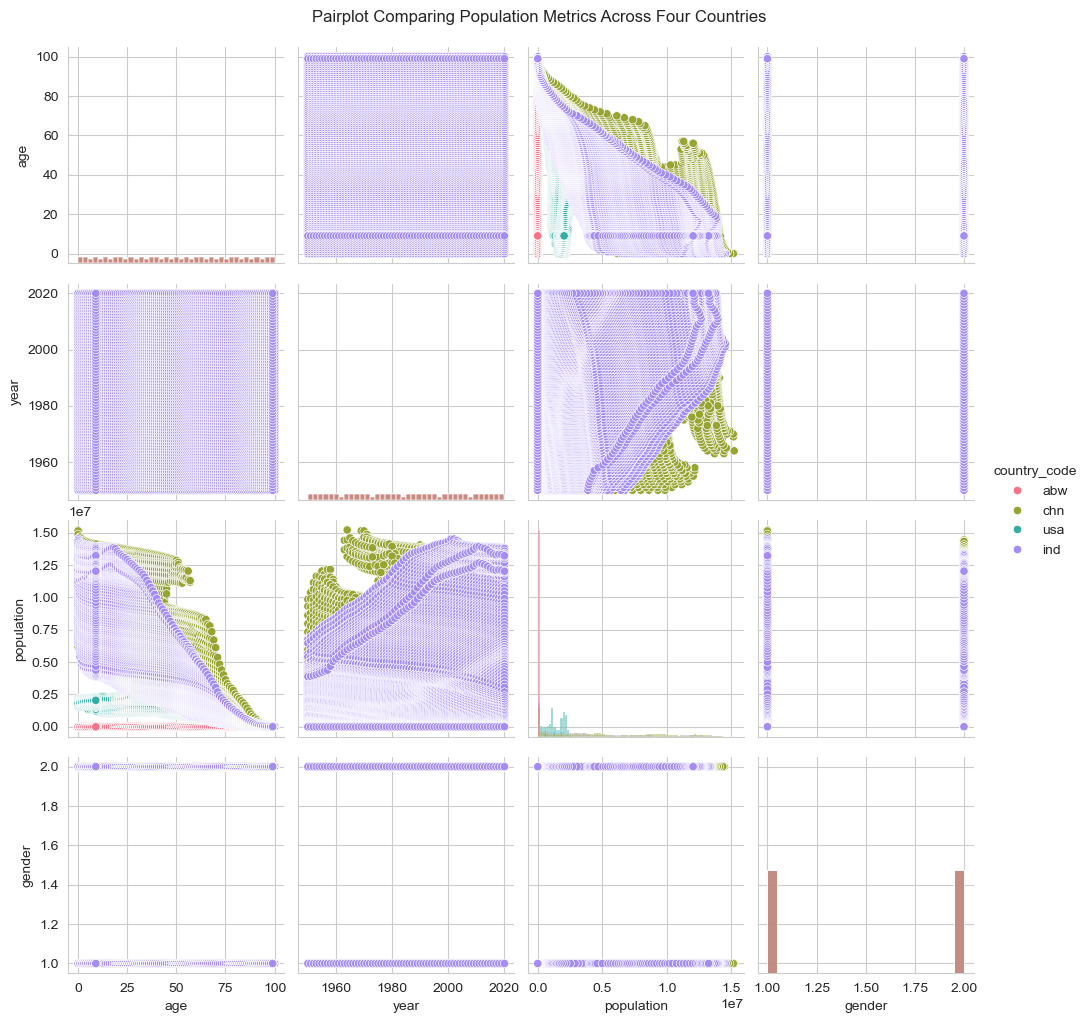

In [8]:
#Set the seaborn style and color palette with exactly 4 colors for 4 countries
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 4)  #Adjust palette to match the number of countries

# Select four countries
selected_countries = ['abw', 'chn', 'usa', 'ind']

# Load data for selected countries and combine into a single DataFrame
dfs = []
for country in selected_countries:
    file_path = f'{data_dir}/ddf--datapoints--population--by--country-{country}--age--gender--year.csv'
    try:
        df_country = pd.read_csv(file_path)
        df_country['country_code'] = country 
        dfs.append(df_country)
    except FileNotFoundError:
        print(f"File not found: {file_path}")

df_combined = pd.concat(dfs, ignore_index=True)

# Filter year and fields
df_filtered = df_combined[(df_combined['year'] >= 1950) & (df_combined['year'] <= 2020)]
df_filtered = df_filtered[['age', 'year', 'population', 'country_code', 'gender']]

# Create the pairplot 
sns.pairplot(df_filtered, hue='country_code', palette=palette, diag_kind='hist')
plt.suptitle('Pairplot Comparing Population Metrics Across Four Countries', y=1.02)
plt.show()
